In [3]:
pip install --upgrade scanpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 6.3 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8025 sha256=2ea13adbc4550c9c722cf30a19a54846740d52523723edee369322207c033a7c
  Stored in directory: /home/luotao/.cache/pip/wheels/10/95/8e/0027616beb8c496d40470a655c3fbb5699aec17e5004258617
Successfully built session-info
  Attempting uninstall: scanpy
    Found existing installation: scanpy 1.8.2
    Uninstalling scanpy-1.8.2:
      Successfully uninstalled scanpy-1.8.2
Note: you may need to restart the kernel to use updated packages.


In [2]:
import scanpy as sc

print("Scanpy: ", sc.__version__)

Scanpy:  1.9.3


# 单细胞RNA测序步骤包含：
1. 数据预处理(Pre-processing)
2. 质量控制(Quality control)
3. 标准化(Normalization)
4. 数据校正和整合(Data correction & integration)
5. 特征选择，降维和可视化(Feature selection, dimensionality reduction and visualization)
6. 下游分析(Downstream analysis)


## 数据预处理(Pre-processing)
数据预处理的目的是获得counts矩阵或者read counts矩阵，
测序获得的原始数据开始预处理的方法主要是进行质量控制，
比对reads到细胞barcode和mRNA分子上（也称为demultiplexing），基因组比对，count矩阵的量化。
这里的count矩阵一般每一列代表一个barcode，每一行代表一个gene。

## 质量控制(Quality control)

* 质控有3个指标:

  * 测到的转录本分子总数
  * 测到的基因总数
  * 来源于线粒体基因的转录本所占比例。

质控就是检查这3个指标的分布中是否存在异常峰并设置阈值去除。

## 标准化(Normalization)
计数矩阵中的每个count代表细胞mRNA分子的成功捕获，逆转录和测序。
由于每个步骤固有的可变性，相同单元的计数深度可能会有所不同。
因此，当基于count data比较细胞之间的基因表达时，可能仅由于采样效应而产生了差异。
标准化解决了这个问题如通过缩放计数数据以获得正确的细胞间相关基因表达丰度。

##  数据校正和整合(Data correction & integration)
数据校正主要目标是进一步消除技术和生物学效应偏差，例如批次效应，dropout，或者细胞周期效应。
根据不同的分析目的我们针对特定的效应参数进行校正。

降低生物学效应
降低技术效应影响
批次效应和数据整合 这个步骤是我们重点研究的步骤。

## 特征选择，降维和可视化(Feature selection, dimensionality reduction and visualization)

* 特征选择 对数据集基因进行过滤仅保留对数据具有信息贡献的基因（即高变化基highly variable genes - HVG）
* 降维 特征选择后，可以通过专用的降维算法进一步对单细胞表达矩阵进行降维。这些算法将表达式矩阵映射到低维空间中，同时以尽可能少的维数捕获数据中所有的信息。
* 可视化 可视化时一般使用非线性降维方法。scRNA-seq数据可视化的最常见的降维方法是t-SNE。t‐SNE的维度着重于以牺牲全局结构为代价来保留局部相似性。

## 下游分析(Downstream analysis)
* 聚类分析(Cluster analysis) 将细胞聚类成簇通常是单细胞分析的第一个中间结果。聚类成簇使我们可以推断成员细胞的身份。簇是通过基于细胞基因表达谱的相似性将细胞分组得到的。
* 聚类注释(Cluster annotation) 在基因水平上，对每个簇的分析是鉴定其标记基因 (Marker genes)。这些所谓的标记基因代表了细胞簇的特征，用于给细胞簇一个有生物学意义的标签。该标签表示集群中细胞的身份。
* 轨迹分析(Trajectory analysis) 为了捕获细胞身份之间的过渡状态、不同的分化分支或生物学功能的渐进式非同步变化，我们需要动态的基因表达模型。这类方法称为轨迹推断(trajectory inference，TI)。
* 基因水平的分析(Gene-level analysis) 单细胞数据的基因水平分析有更广泛的内容。差异表达分析、基因集分析和基因调控网络分析都可以直接研究数据中的分子信号。这些方法不是描述细胞异质性，而是把这种异质性作为理解基因表达差异的背景。

### 在Jupyternotebook or lab中，可以通过按SHIFT + TAB键查看python函数的文档。点击两次以展开视图。

In [3]:
import numpy as np
import pandas as pd
import scanpy as sc

In [4]:
# 数据由来自健康捐赠者的3千个外周血细胞(PBMC)组成，
# 可从10x Genomics免费获得(http://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz)，
# 也可以从scanpy.datasets中下载。

adata = sc.datasets.pbmc3k()
adata.var_names_make_unique()

print(adata)

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'


In [5]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

/home/luotao/anaconda3/envs/stock/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.3 anndata==0.8.0 umap==0.5.3 numpy==1.23.5 scipy==1.10.1 pandas==1.5.3 scikit-learn==1.2.2 statsmodels==0.13.5 python-igraph==0.10.4 louvain==0.8.0 pynndescent==0.5.8


In [204]:
adata = sc.read_10x_mtx(
    'data/filtered_gene_bc_matrices/hg19/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)  

... reading from cache file cache/data-filtered_gene_bc_matrices-hg19-matrix.h5ad


normalizing counts per cell
    finished (0:00:00)


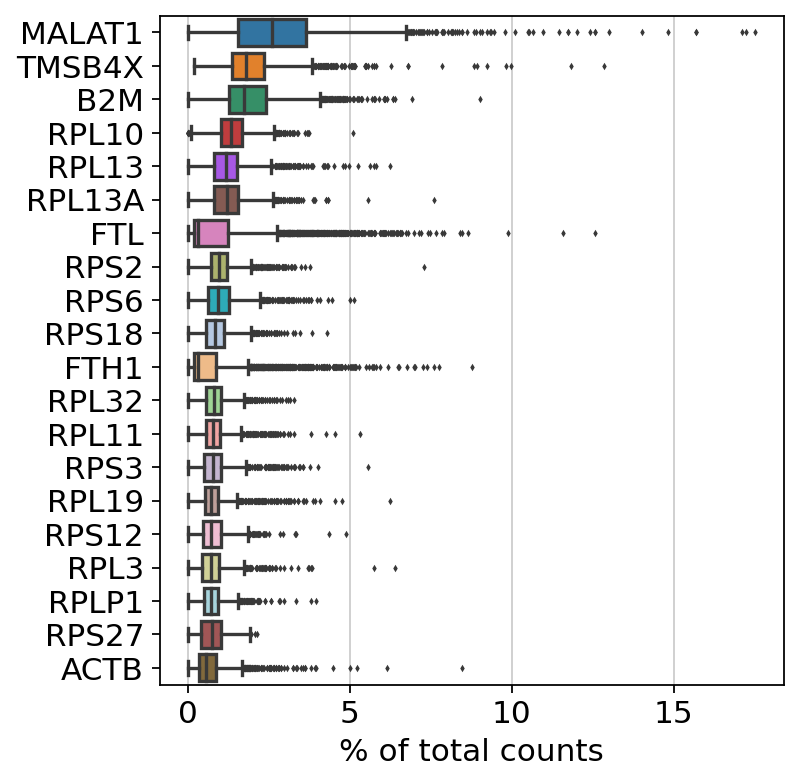

In [205]:
# 查看高表达的前20个基因
sc.pl.highest_expr_genes(adata, n_top=20, save='_pbmc3k.png')

In [206]:
# 基本过滤：

# 过滤细胞中表达不超过200个基因的细胞
sc.pp.filter_cells(adata, min_genes=200)

# 过滤掉表达基因少于3个细胞的基因
sc.pp.filter_genes(adata, min_cells=3)

filtered out 19024 genes that are detected in less than 3 cells


In [207]:
# annotate the group of mitochondrial genes as 'mt'
# 把线粒体基因注释为mt

adata.var['mt'] = adata.var_names.str.startswith('MT-')  
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

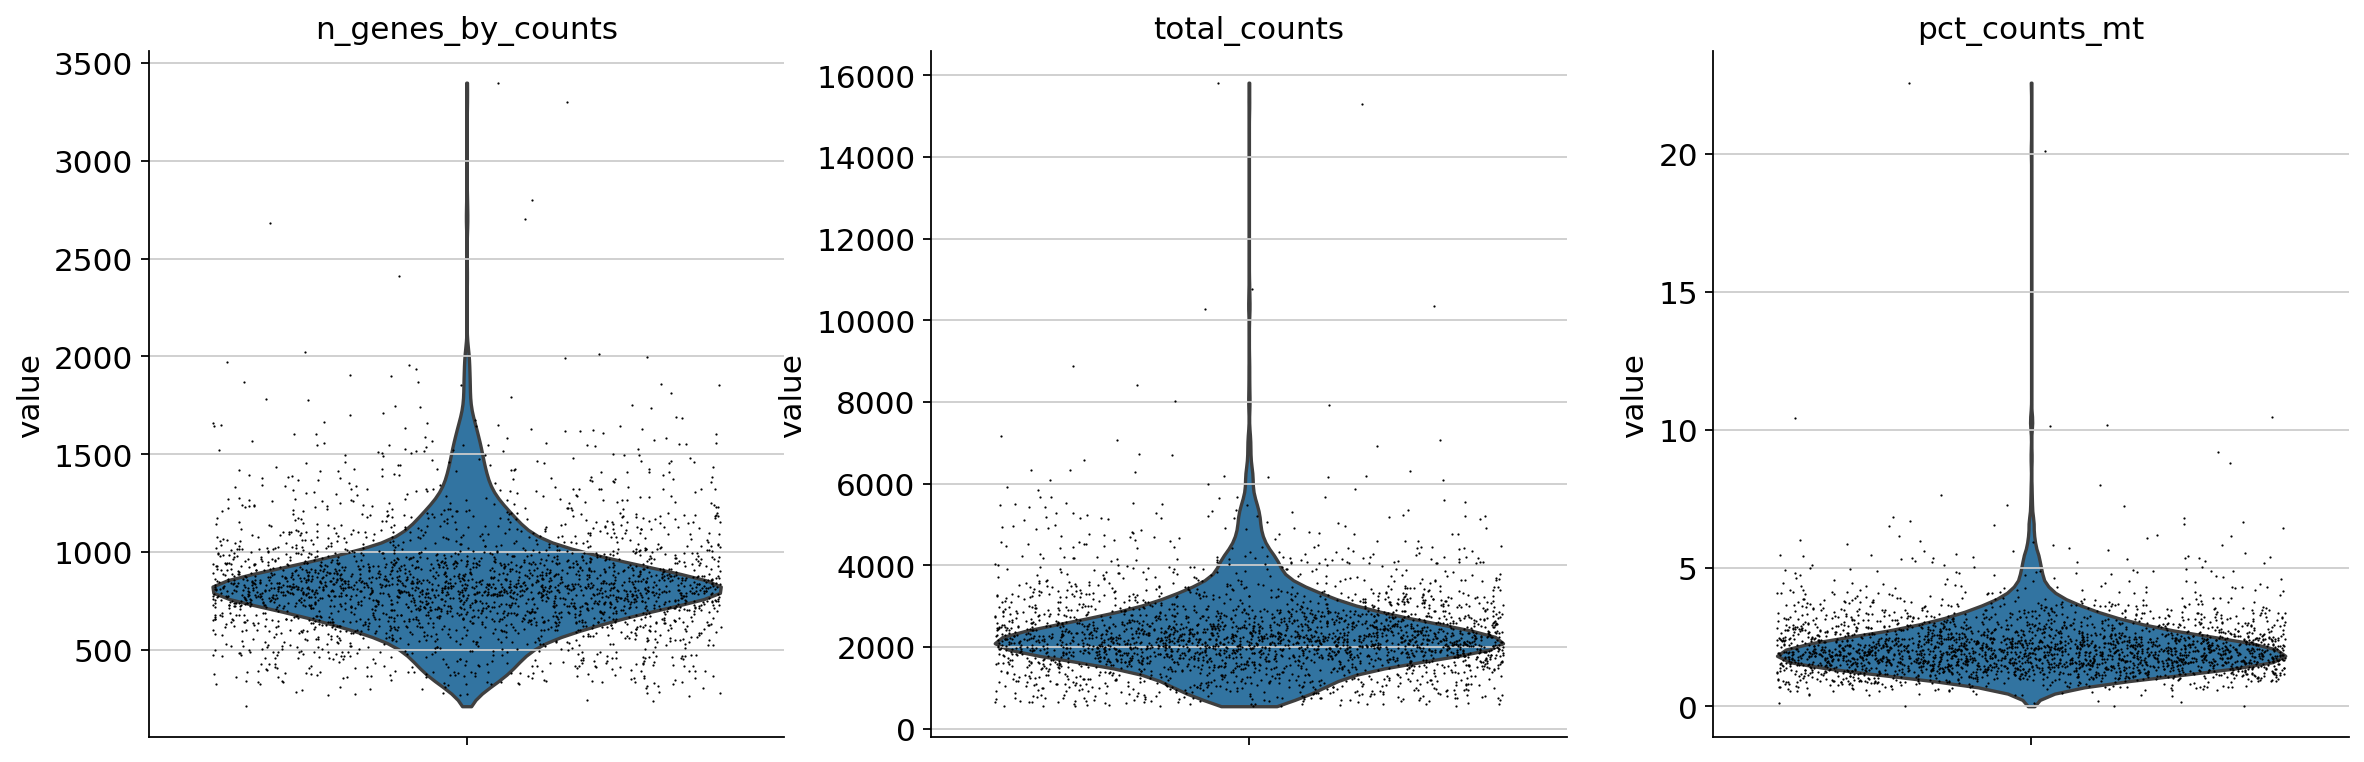

In [208]:
# 分别为：
# 在count矩阵中表达的基因数量，
# 每个细胞的总count数，
# 线粒体基因占count的百分比
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

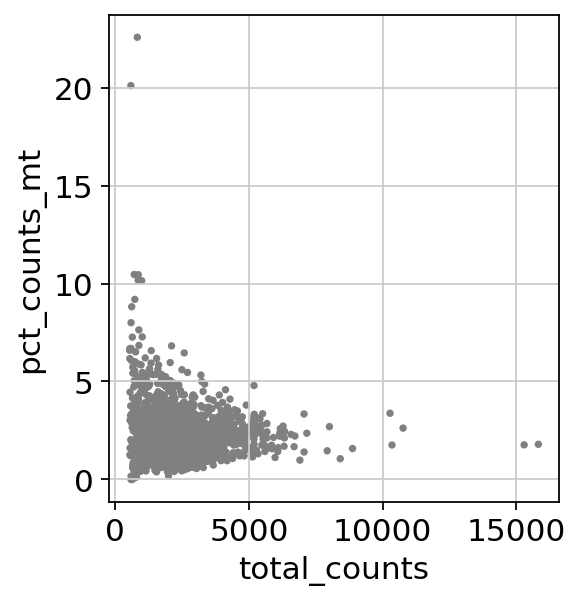

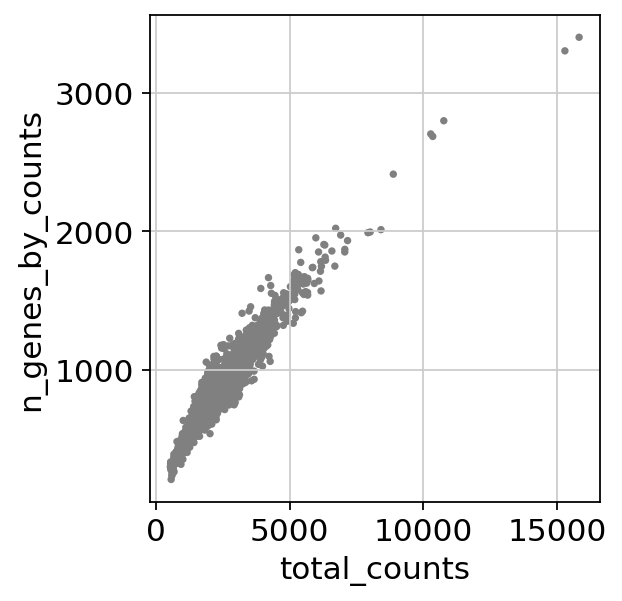

In [209]:
# 去除表达过多线粒体基因或总数过多的细胞:

# 单个细胞的总count为横坐标，线粒体基因百分比为纵坐标
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')

# 单个细胞的总count为横坐标，count矩阵中表达的基因数量为纵坐标
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')


In [210]:
# 根据基因数量和线粒体百分比进行过滤

#实际为做切片进行过滤
adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

---
## 标准化
* 在单细胞RNA测序数据中经常观察到文库之间测序覆盖率的系统性差异。
* 它们通常源于cDNA捕获或细胞间PCR扩增效率的技术差异，这是由于难以用最少的材料实现一致的文库制备。
* 标准化旨在消除这些差异，使它们不会干扰细胞间表达谱的比较。
* 这确保了在细胞群中观察到的任何异质性或差异表达都是由生物学而非技术偏差驱动的

In [211]:
# 总计数归一化、对数化

sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

normalizing counts per cell
    finished (0:00:00)


/home/luotao/anaconda3/envs/stock/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


### normalize_total函数主要做了2件事情：
1. 把最大值压缩到target_sum之内；
2. 每一行做归一化处理。

In [196]:
# 例子不运行
from anndata import AnnData
import scanpy as sc
import numpy as np

sc.settings.verbosity = 2
np.set_printoptions(precision=2)
adata = AnnData(np.array([
   [3, 3, 3, 6, 6],
   [1, 1, 1, 2, 2],
   [1, 22, 1, 2, 2],
]))

print(adata.X)

[[ 3.  3.  3.  6.  6.]
 [ 1.  1.  1.  2.  2.]
 [ 1. 22.  1.  2.  2.]]


/tmp/ipykernel_28667/575997374.py:7: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(np.array([


In [201]:
# 例子不运行
# 归一化
X_norm = sc.pp.normalize_total(adata, target_sum=1, inplace=False)['X']
print(X_norm)

normalizing counts per cell
    finished (0:00:00)
[[0.17 0.17 0.17 0.24 0.24]
 [0.16 0.16 0.16 0.26 0.26]
 [0.1  0.47 0.1  0.16 0.16]]


---
### 对数化
* 对偏度比较大的数据用log1p函数进行转化，使其**更加服从高斯分布**。

In [198]:
# 对数化
sc.pp.log1p(adata)


# log1p，是对 x+1 取对数。

# log1p = log(1 + x)

#### 除了简单的normalize_total，归一化还有其他方法，
* 比如批标准化 (Batch Normalization)
* 层标准化 (Layer Normalization)
* 组标准化 (Group Normalization)

## 特征选择
在探索性分析中使用scRNA-seq数据来表征细胞间的异质性。  
聚类和降维等任务，根据细胞的基因表达谱比较细胞，这涉及将每个基因的差异聚合成细胞之间的相似性度量。  
在此计算中使用的基因的选择对度量的**性能**有重大影响。  
我们希望选择包含有关系统生物学的**有用信息**的基因，同时删除包含**随机噪声**的基因。  
这样做的目的是保留有趣的生物结构，而不会出现模糊该结构的差异，并减少数据的大小以提高后续步骤的计算效率

extracting highly variable genes
    finished (0:00:00)


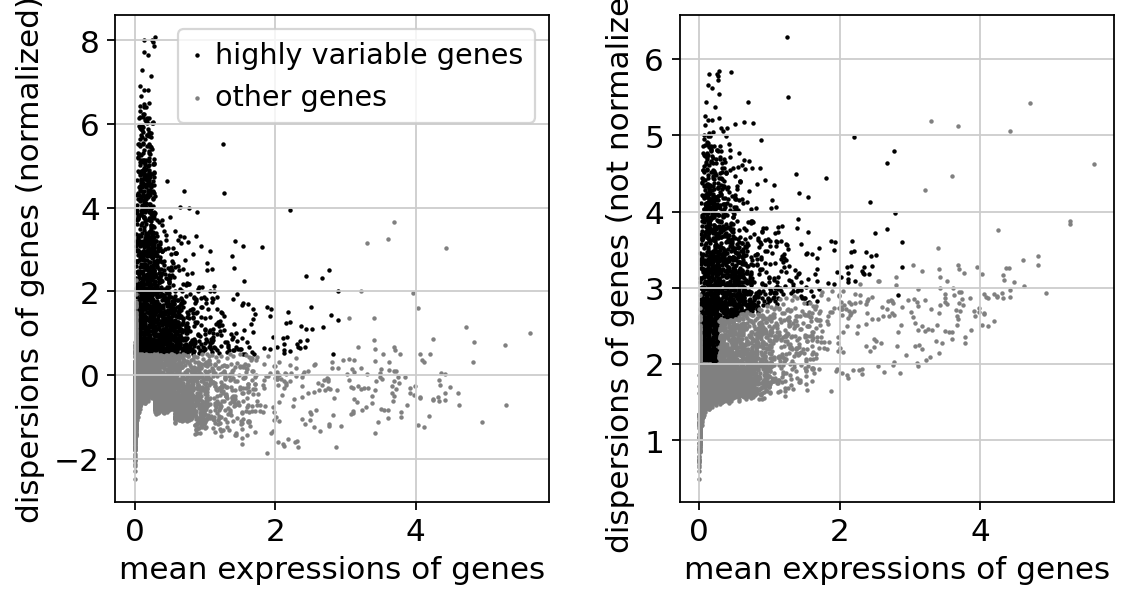

In [212]:
# 识别高度可变的基因

sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata, save='_pbmc3k.png')

### 高可变基因如何计算？

In [ ]:
# 计算均值和方差 
mean, var = materialize_as_ndarray(_get_mean_var(X))

# 计算离散(dispersion)度，离散度就是数据偏离平均值的程度。
dispersion = var / mean

# 离散度归一化
dispersions_norm = (dispersions - disp_mean_bin) / disp_std_bin

# 取基因集 dispersions_norm排序，按n_top_genes取
# 或者
# 按dispersions_norm进行条件过滤
#  (
# 	mean > min_mean,
# 	mean < max_mean,
# 	dispersion_norm > min_disp,
# 	dispersion_norm < max_disp,
# )
# 取符合条件的基因集合

#为了提高计算速度，高可变基因(hvg)，一般取值2000左右。这个取值是否合理，后续我们认真分析。

In [18]:
# 保存原始数据
adata.raw = adata
# 保存的数据读出
bdata = adata.raw.to_adata()

In [19]:
print(adata,bdata)
# 过滤后adata不同了

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'log1p', 'rank_genes_groups' AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'log1p', 'rank_genes_groups'


In [215]:
# 过滤

adata = adata[:, adata.var.highly_variable]


## 之前的集合


In [33]:
import scanpy as sc

# ==========================
# PBMC3K数据
# ==========================
adata = sc.datasets.pbmc3k()

# ==========================
# 质量控制
# ==========================
# 基本过滤
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

# 计算质量控制指标
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

# 根据基因数量和线粒体百分比进行过滤
adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

# ==========================
# 数据标准化
# ==========================
#总计数归一化
sc.pp.normalize_total(adata, target_sum=1e4)
# 对数化
sc.pp.log1p(adata)


# ==========================
# 特征选取
# ==========================
# 识别高度可变的基因
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

# 保存原始数据
adata.raw = adata
# 过滤
adata = adata[:, adata.var.highly_variable]

# 将数据缩放到单位方差
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])
sc.pp.scale(adata, max_value=10)

results_file = './data/pbmc3k_processed_for.h5ad'
adata.write(results_file)

filtered out 19024 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes


/home/luotao/anaconda3/envs/stock/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:00:06)


In [216]:
# 进一步做数据标准化
# 将数据缩放到单位方差
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])
sc.pp.scale(adata, max_value=10)

# 保存数据  这里定义了一个保存地址
results_file = './data/pbmc3k_processed_for_tsne.h5ad'
adata.write(results_file)

regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:00:06)


### 降维
* 顾名思义，降维旨在减少数据中单独维度的数量，减少了下游分析（如聚类）中的计算工作。

### 降维之PCA

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:12)


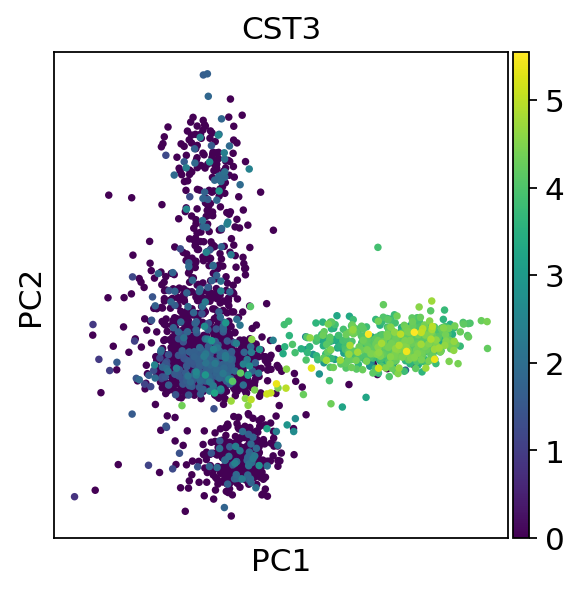

In [217]:
# 通过运行主成分分析(PCA)来降低数据的维数，该分析揭示了变化的主轴并对数据进行去噪。

# 降维和可视化
# ==========================
#通过运行主成分分析(PCA)来降低数据的维数。

sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca(adata, color='CST3', save='_pbmc3k_CST3.png')

#### 这里的PCA是采用SVD的方法求解，我们在这里简单介绍SVD
* 奇异值分解是一个能适用于任意矩阵的一种分解的方法，对于任意矩阵A总是存在一个奇异值分解
* [我也不知道讲的什么](https://zhuanlan.zhihu.com/p/537818779)


* 基于SVD分解协方差矩阵实现PCA算法 输入：数据集 ，需要降到k维。

1. 去平均值，即每一位特征减去各自的平均值。
2. 计算协方差矩阵。
3. 通过SVD计算协方差矩阵的特征值与特征向量。
4. 对特征值从大到小排序，选择其中最大的k个。然后将其对应的k个特征向量分别作为列向量组成特征向量矩阵。
5. 将数据转换到k个特征向量构建的新空间中。

**PCA需要进行矩阵计算，如果细胞的数量大了，需要非常大的内存，例如超过100万个细胞，很多服务器就跑不动了。**

In [186]:
# PCA 例子
##用sklearn的PCA
from sklearn.decomposition import PCA
import numpy as np
X = np.array([[-1, 1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca=PCA(n_components=1)
pca.fit(X)
print(pca.transform(X))

[[ 0.51]
 [ 2.4 ]
 [ 3.78]
 [-1.2 ]
 [-2.06]
 [-3.43]]


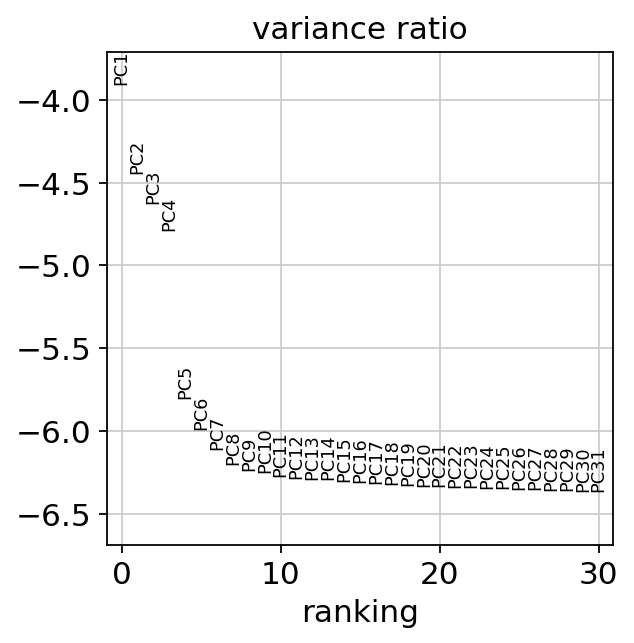

In [114]:
# 检查单个 PC (主成分，Principal Component)对数据总方差的贡献。  

# 检查一下单个pc对数据中总方差的贡献。
# 这为我们提供了关于我们应该考虑多少个pc以计算单元的邻域关系的信息，
# 例如在聚类函数sc.tl.louvain()或tSNE sc.tl.tsne()中使用。
# 根据我们的经验，通常粗略估计pc的数量就可以了。
sc.pl.pca_variance_ratio(adata, log=True, save='_pbmc3k_pc.png')

###  降维之t-sne


computing tSNE
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:00:10)
    using sklearn.manifold.TSNE
    finished (0:00:48)


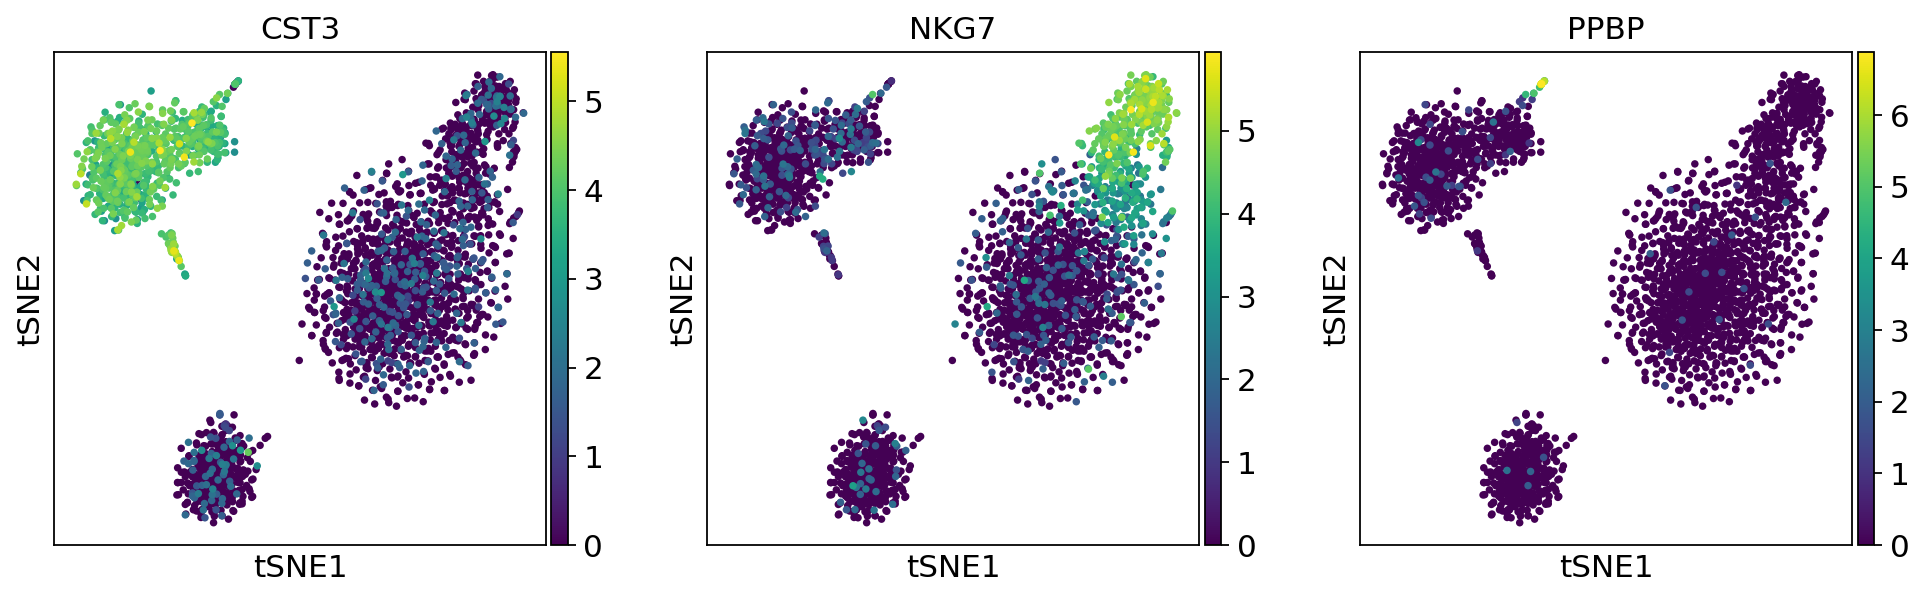

In [225]:
#通过运行t-SNE来降低数据的维数。
sc.tl.tsne(adata)
sc.pl.tsne(adata, color=['CST3', 'NKG7', 'PPBP'], save='_pbmc3k_CST3_NKG7_PPBP.png')

[t-sne解释,我也看不懂啊](https://zhuanlan.zhihu.com/p/538162463)

### 降维之UMAP

computing neighbors
    finished (0:00:00)
computing UMAP
    finished (0:00:09)


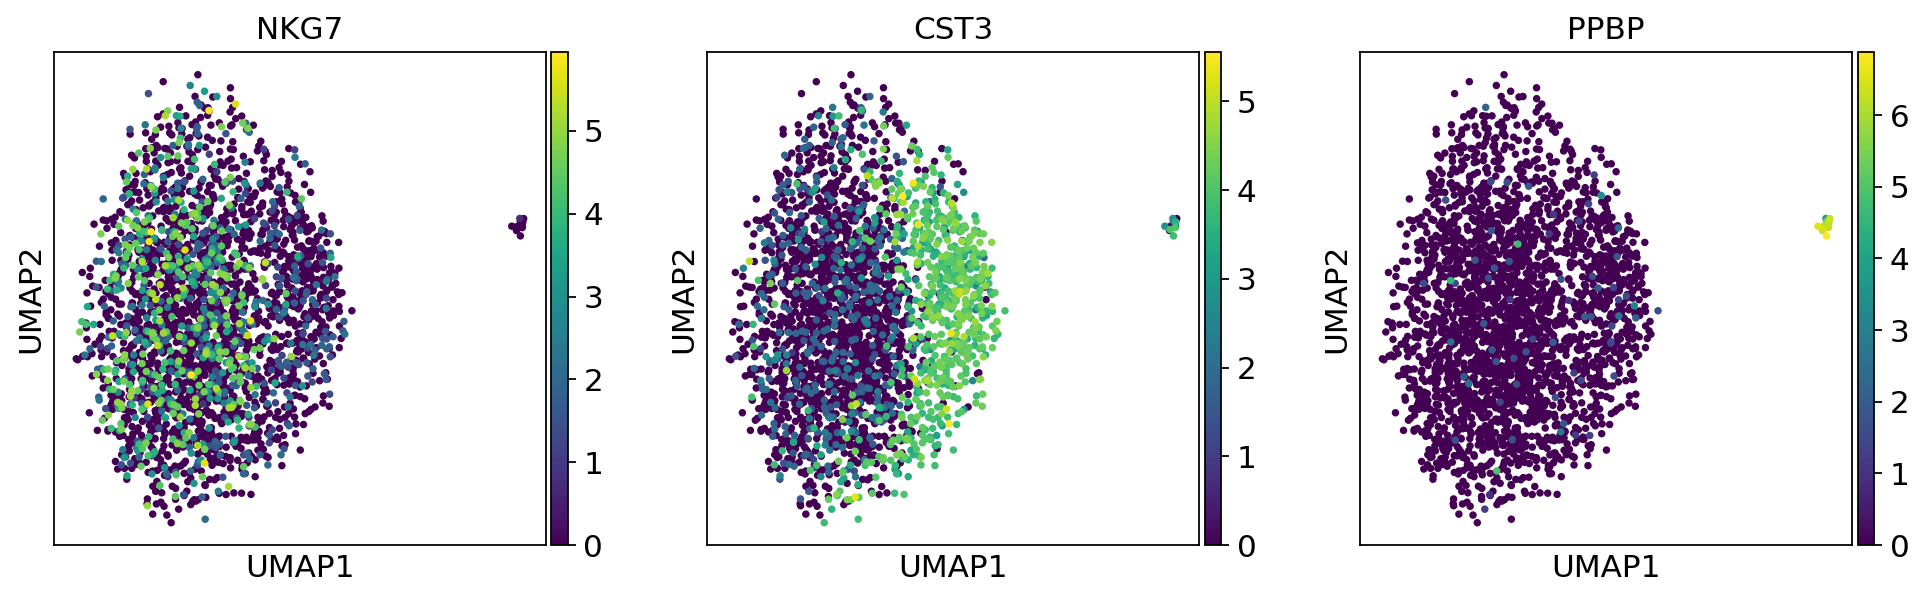

In [231]:
#通过运行umap来降低数据的维数。
# results_file = './data/pbmc3k_processed_for_tsne.h5ad'
# adata = sc.read(results_file)

sc.pp.neighbors(adata, n_neighbors=10, use_rep='X') # 定义了这个use_rep分出来就是一坨
sc.tl.umap(adata)
sc.pl.umap(adata, color=['NKG7','CST3',  'PPBP'], save='_pbmc3k_CST3_NKG7_PPBP.png')

## 聚类
聚类是一种无监督学习过程，用于凭经验定义具有相似表达谱的细胞组。其主要目的是将复杂的 scRNA-seq 数据汇总为可消化的格式以供人类解释
### 聚类之Louvain
* Louvain算法是一种基于多层次（逐轮启发式迭代）优化模块度的算法

computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:00:16)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:20)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:07)


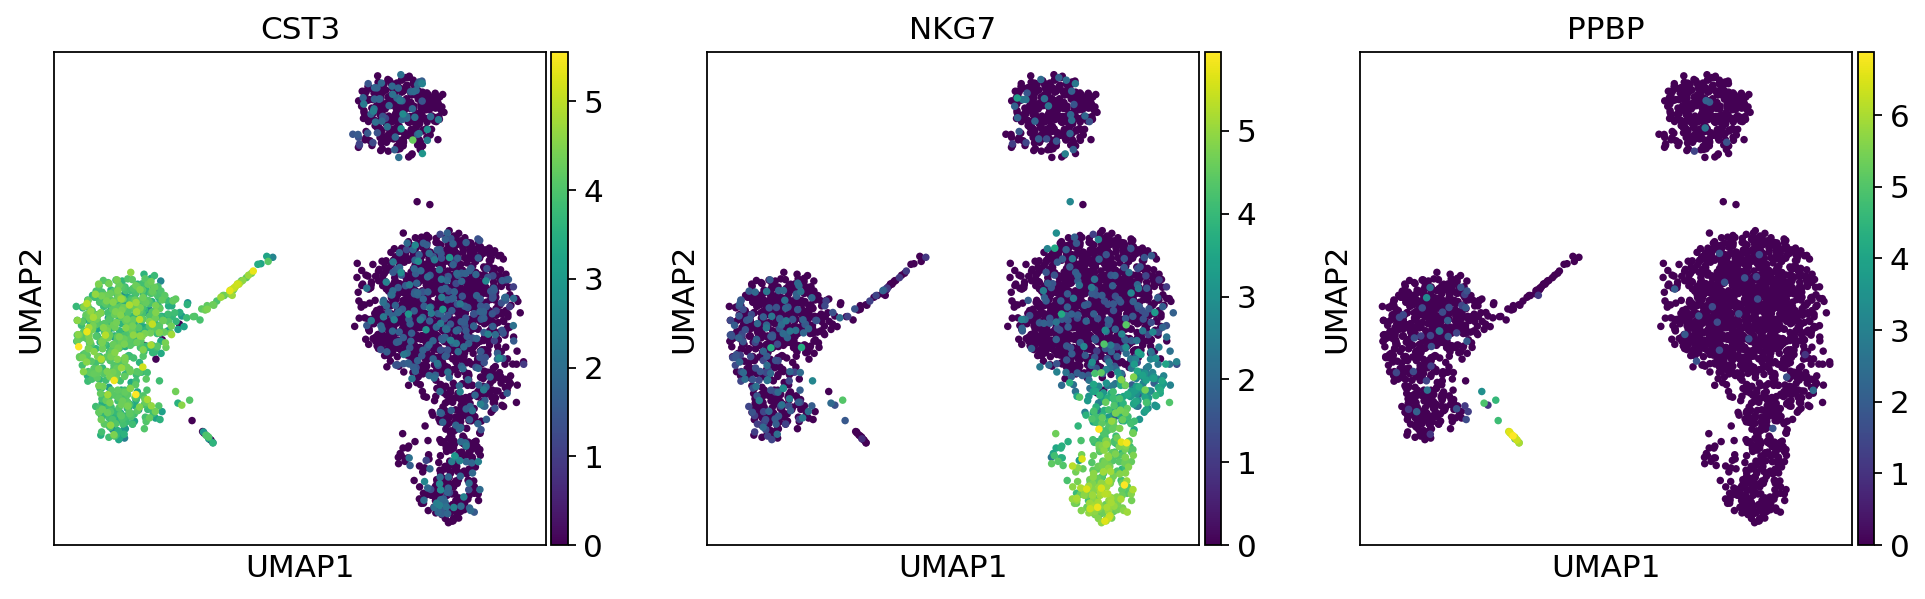

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 7 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)


/home/luotao/anaconda3/envs/stock/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


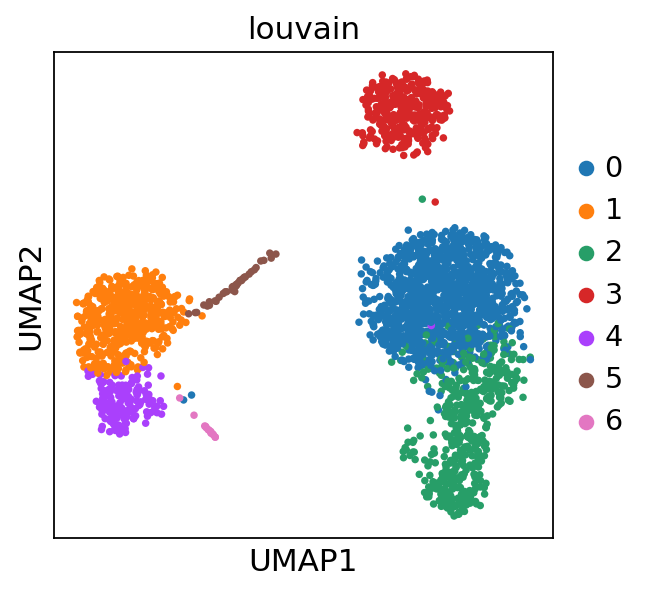

In [6]:
results_file = './data/pbmc3k_processed_for_tsne.h5ad'
adata = sc.read(results_file)
# ==========================
# 降维、聚类和可视化
# ==========================
#通过运行umap来降低数据的维数。
sc.pp.neighbors(adata, n_neighbors=10)
sc.tl.umap(adata)
sc.pl.umap(adata, color=['CST3', 'NKG7', 'PPBP'], save='_pbmc3k_CST3_NKG7_PPBP.png')

# 通过上边降维后，使用louvain聚类
sc.tl.louvain(adata)
sc.pl.umap(adata, color=['louvain'], save='_pbmc3k_louvain.png')


In [54]:
'''''' 不运行
# 嵌入邻域图（Embedding the neighborhood graph）
# 建议使用UMAP将图嵌入二维，见下文。
# 它可能比tSNE更忠实于流形的全局连通性，也就是说，它更好地保留了轨迹。
# 在某些情况下，您可能仍然会观察到断开连接的集群和类似的连接性违规。通常可以通过以下方式来补救:

sc.tl.paga(adata) 
sc.pl.paga(adata, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph（删除' plot=False '如果你想看到粗粒度图）
sc.tl.umap(adata, init_pos='paga')
''''''

SyntaxError: invalid syntax (1259984092.py, line 1)

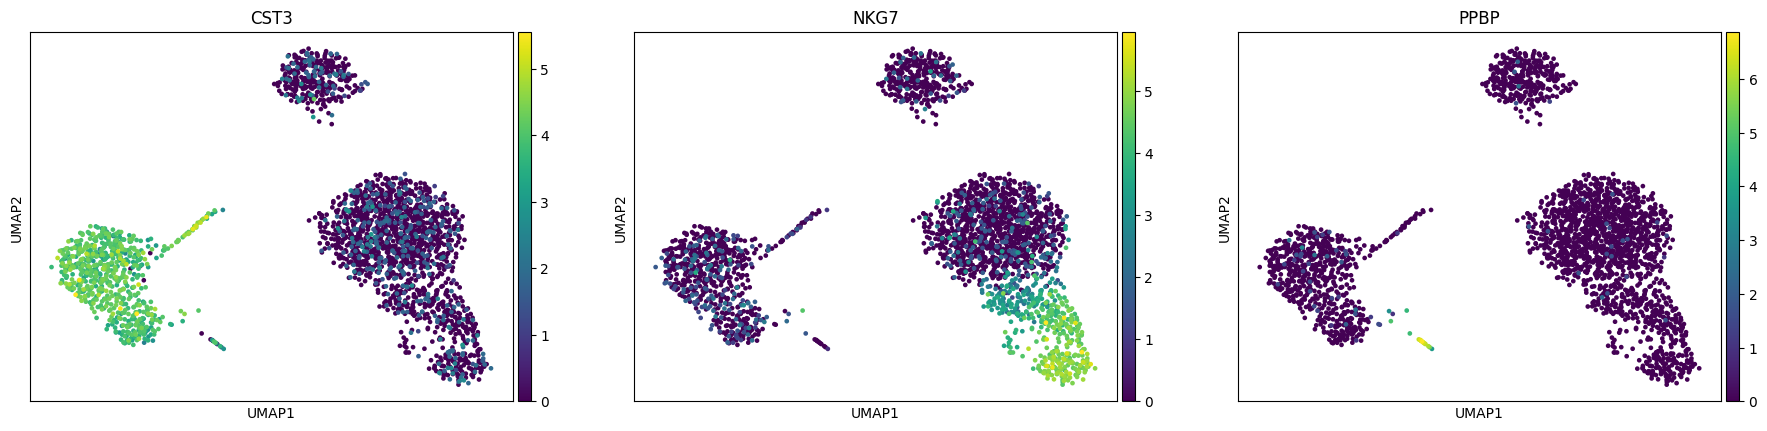

In [6]:
# 计算邻域图（Computing the neighborhood graph）。
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
# UMAP降维。
sc.tl.umap(adata)
sc.pl.umap(adata, color=['CST3', 'NKG7', 'PPBP'])

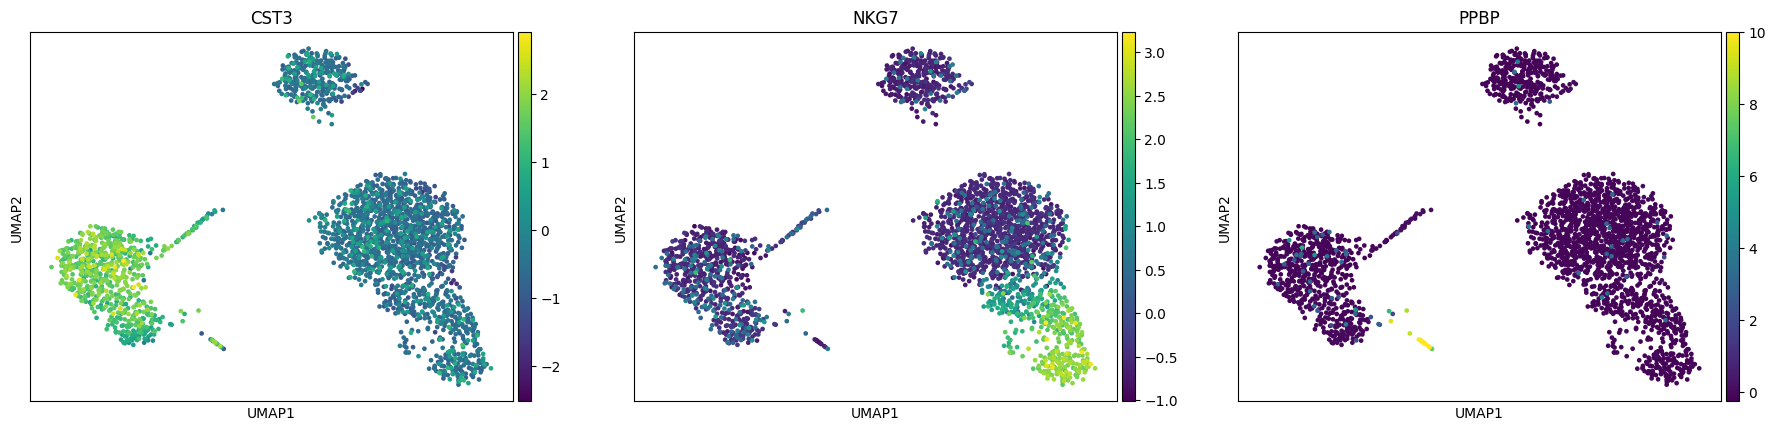

In [7]:
# 当我们设置数据的.raw属性时，前面的图显示了原始的(规范化的、对数化的，但未校正的)基因表达。
# 您还可以通过声明不想使用.raw来绘制缩放和校正的基因表达。
sc.pl.umap(adata, color=['CST3', 'NKG7', 'PPBP'], use_raw=False)

### 聚类之Leiden
louvain存在几个小问题：
1. 社区划分的精度有局限性；
2. 分组内细胞分布密度的大小会影响亚群的鉴定;
3. 被鉴定为同一个分群的细胞群内，存在两个没有连线的小分群。

**leiden主要是解决louvain存在的问题**

computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:00:16)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:16)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:08)
running Leiden clustering
    finished: found 8 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


/home/luotao/anaconda3/envs/stock/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


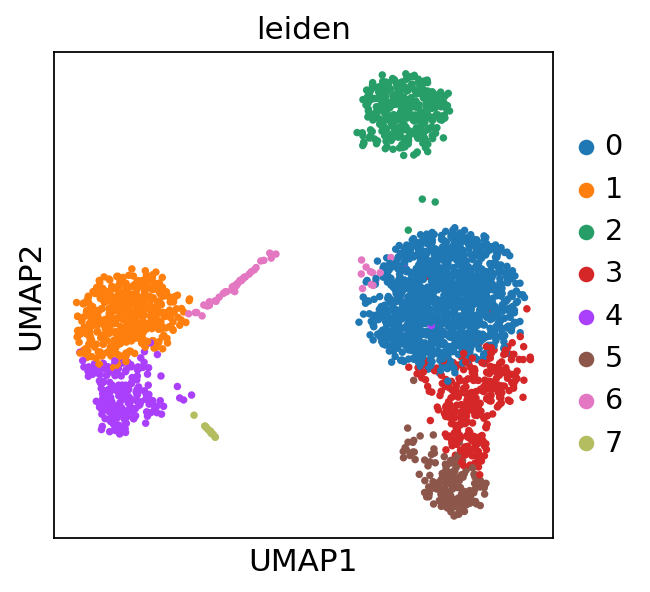

In [46]:

results_file = './data/pbmc3k_processed_for.h5ad'  #存的数据似乎用不了*********
adata = sc.read(results_file)

# 步骤为1. 嵌入邻域图
# 2. 降维
# 3. 聚类
# 4. 绘图


# 与Seurat和许多其他框架一样，我们推荐Traag *等人*(2018)的莱顿图聚类方法(基于优化模块化的社区检测)。
# 请注意，莱顿聚类直接聚类细胞的邻域图，我们已经在前一节中计算过了。

# ==========================
# 降维和可视化
# ==========================
#通过运行umap来降低数据的维数。
sc.pp.neighbors(adata, n_neighbors=10,)
sc.tl.umap(adata)
sc.tl.leiden(adata)
sc.pl.umap(adata, color=['leiden'], save='_pbmc3k_leiden.png')



In [120]:
adata.write(results_file)

filtered out 19024 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes


/home/luotao/anaconda3/envs/stock/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:00:06)
computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:00:13)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:14)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:08)
running Leiden clustering
    finished: found 8 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


/home/luotao/anaconda3/envs/stock/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


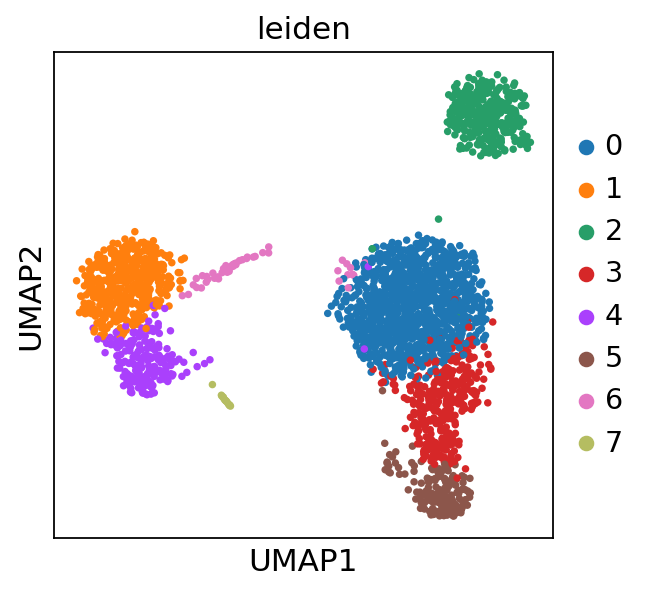

In [47]:
# 得重新执行一边，不然rank不了

import scanpy as sc

# ==========================
# PBMC3K数据
# ==========================
adata = sc.datasets.pbmc3k()

# ==========================
# 质量控制
# ==========================
# 基本过滤
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

# 计算质量控制指标
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

# 根据基因数量和线粒体百分比进行过滤
adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

# ==========================
# 数据标准化
# ==========================
#总计数归一化
sc.pp.normalize_total(adata, target_sum=1e4)
# 对数化
sc.pp.log1p(adata)


# ==========================
# 特征选取
# ==========================
# 识别高度可变的基因
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

# 保存原始数据
adata.raw = adata
# 过滤
adata = adata[:, adata.var.highly_variable]

# 将数据缩放到单位方差
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])
sc.pp.scale(adata, max_value=10)


# ==========================
# 降维、聚类、可视化
# ==========================
#通过运行umap来降低数据的维数。
sc.pp.neighbors(adata, n_neighbors=10)
sc.tl.umap(adata)

sc.tl.leiden(adata)
sc.pl.umap(adata, color=['leiden'], save='_pbmc3k_leiden.png')


## Finding marker genes
1. 进行无监督聚类，例如Leiden；
2. 根据聚类的结果，查找聚类间差异最大的基因作为候选Marker基因；
3. 根据已知的细胞类型Marker基因和候选Marker基因，给聚类分配细胞类型名称。

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


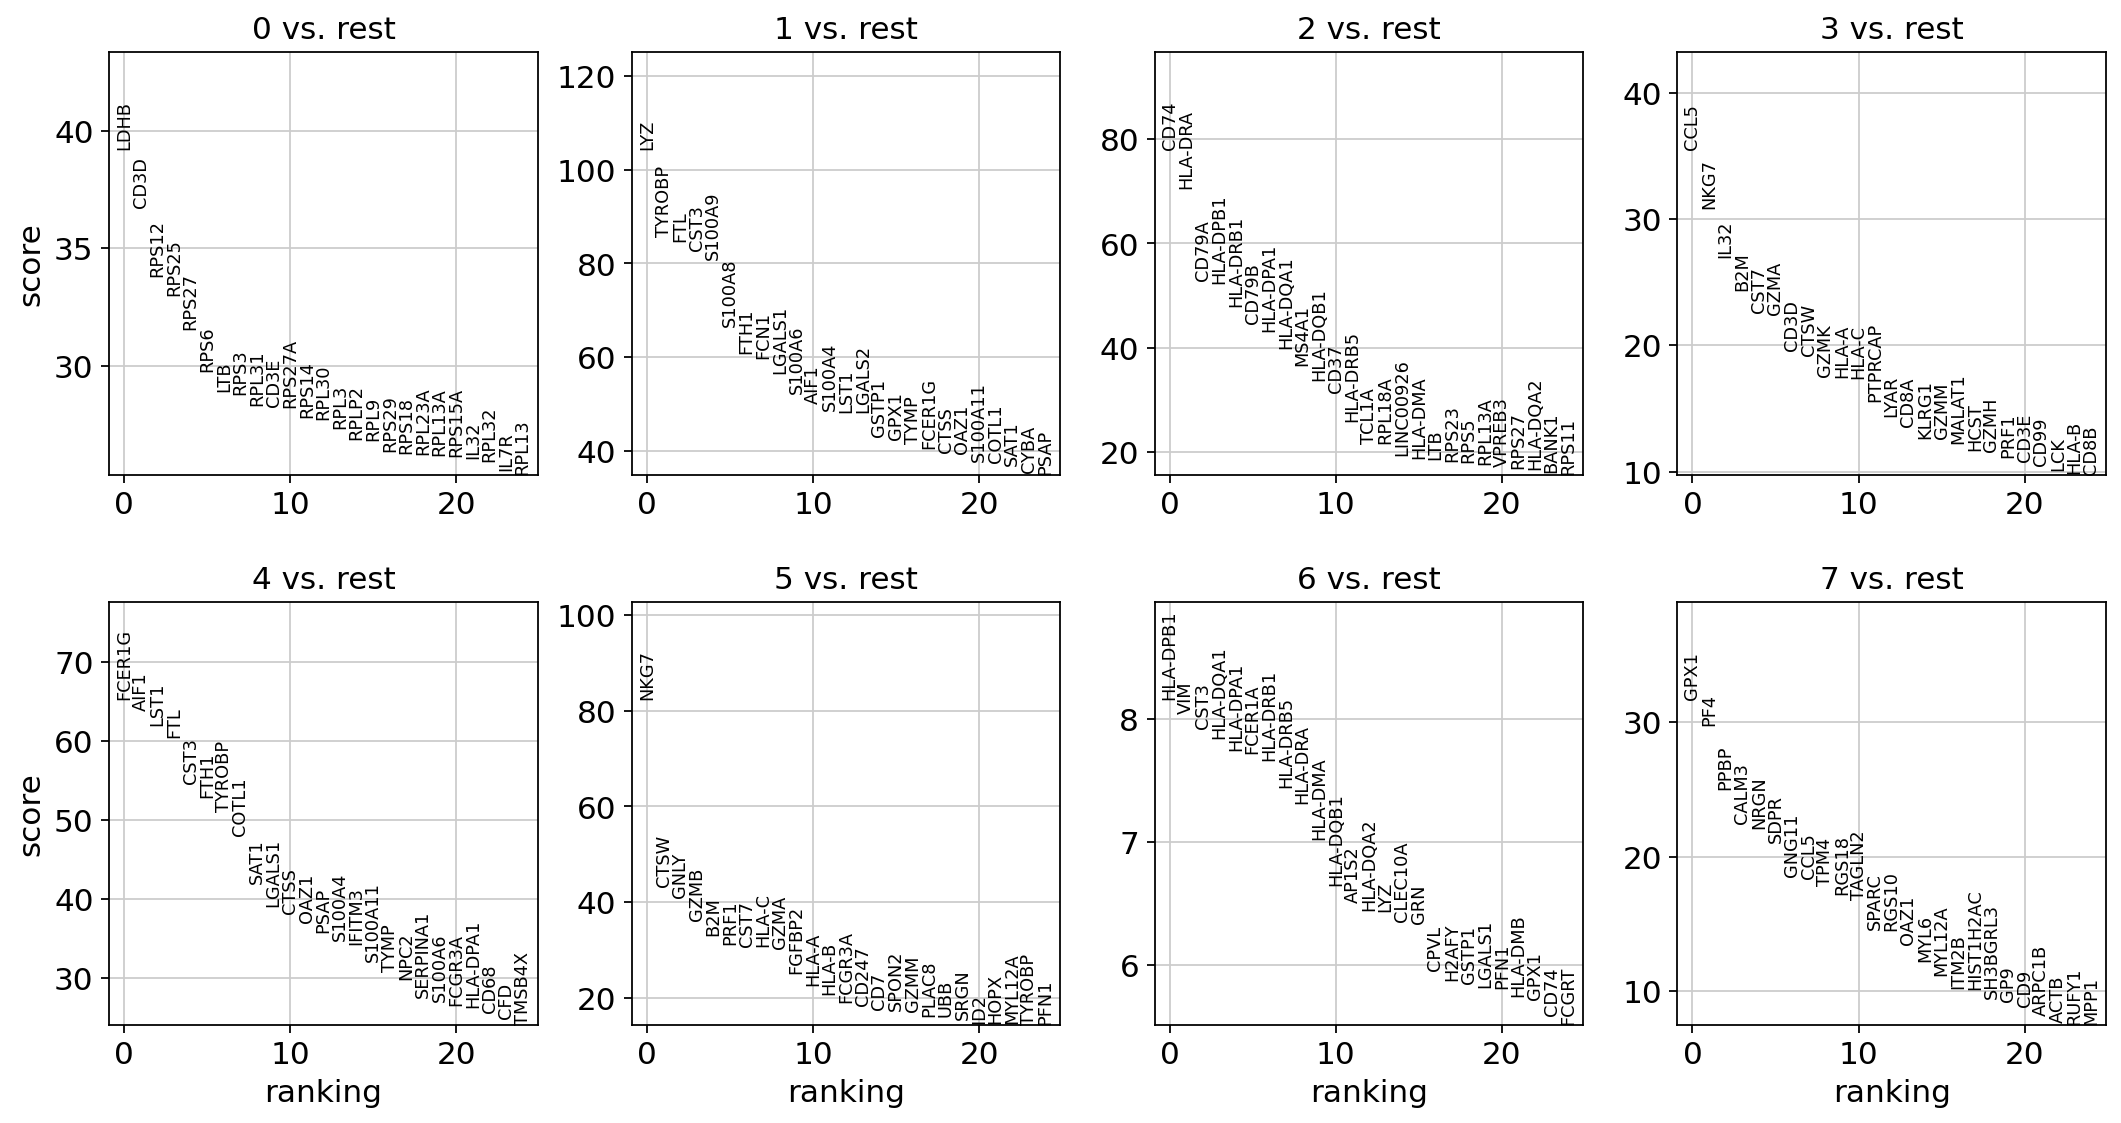

In [48]:
# Finding marker genes
# 让我们计算每个聚类中高差异基因的排名。
# 为此，默认情况下，AnnData的.raw属性被使用，以防它之前已经初始化。最简单和最快的方法是t检验。

# 数据经过降维聚类后才能排列基因
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [122]:

sc.settings.verbosity = 2  # reduce the verbosity（减少冗余）

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:02)


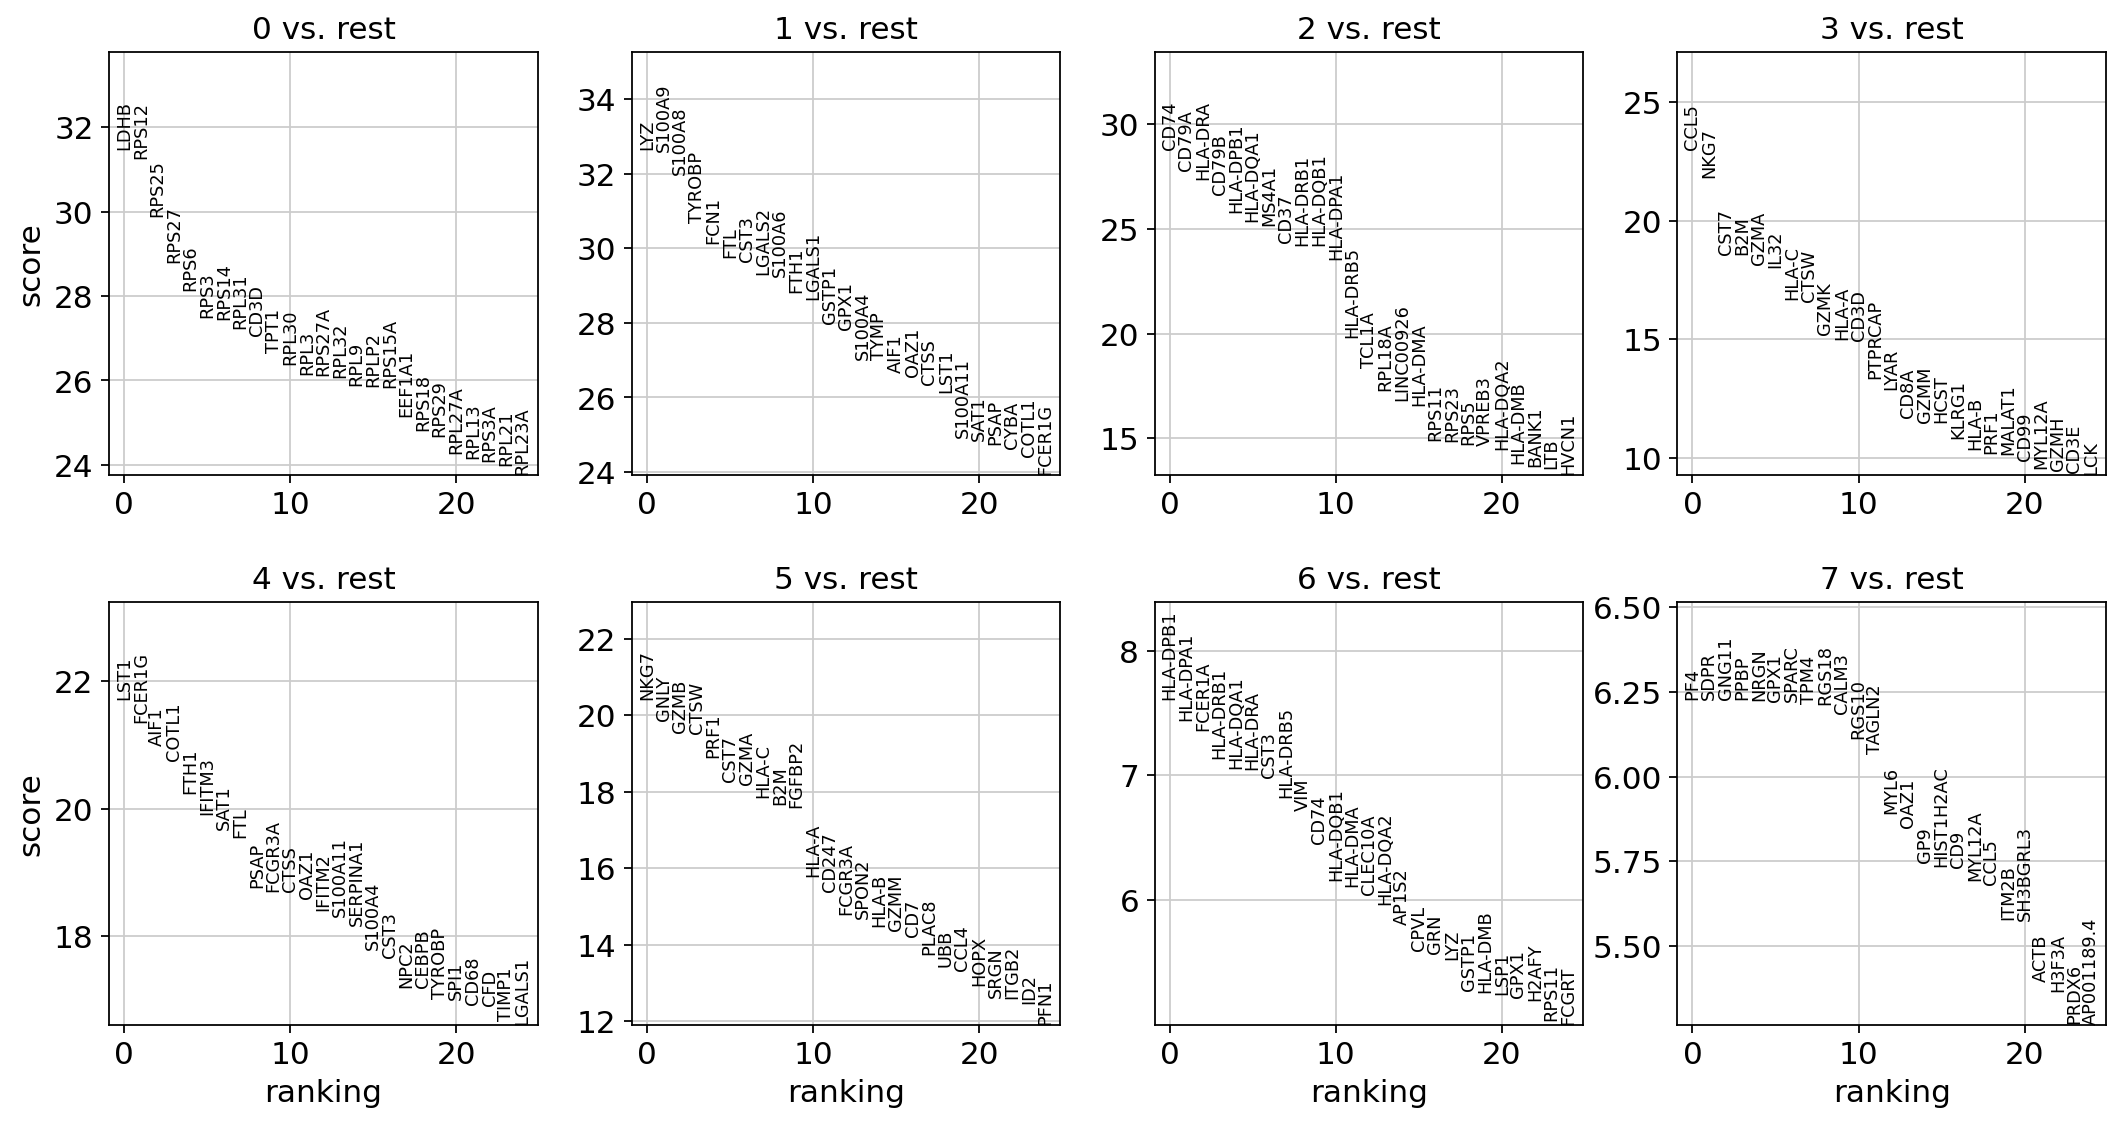

In [49]:
# Wilcoxon秩和(Mann-Whitney-U)检验的结果非常相似。
# 我们建议在出版物中使用后者，参见Sonison & Robinson(2018)。
# 你也可以考虑更强大的差分测试包，比如MAST、limma、DESeq2，对于python来说，还有最近的diffxpy。
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)
adata.write(results_file)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
 (0:00:27)


/home/luotao/anaconda3/envs/stock/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


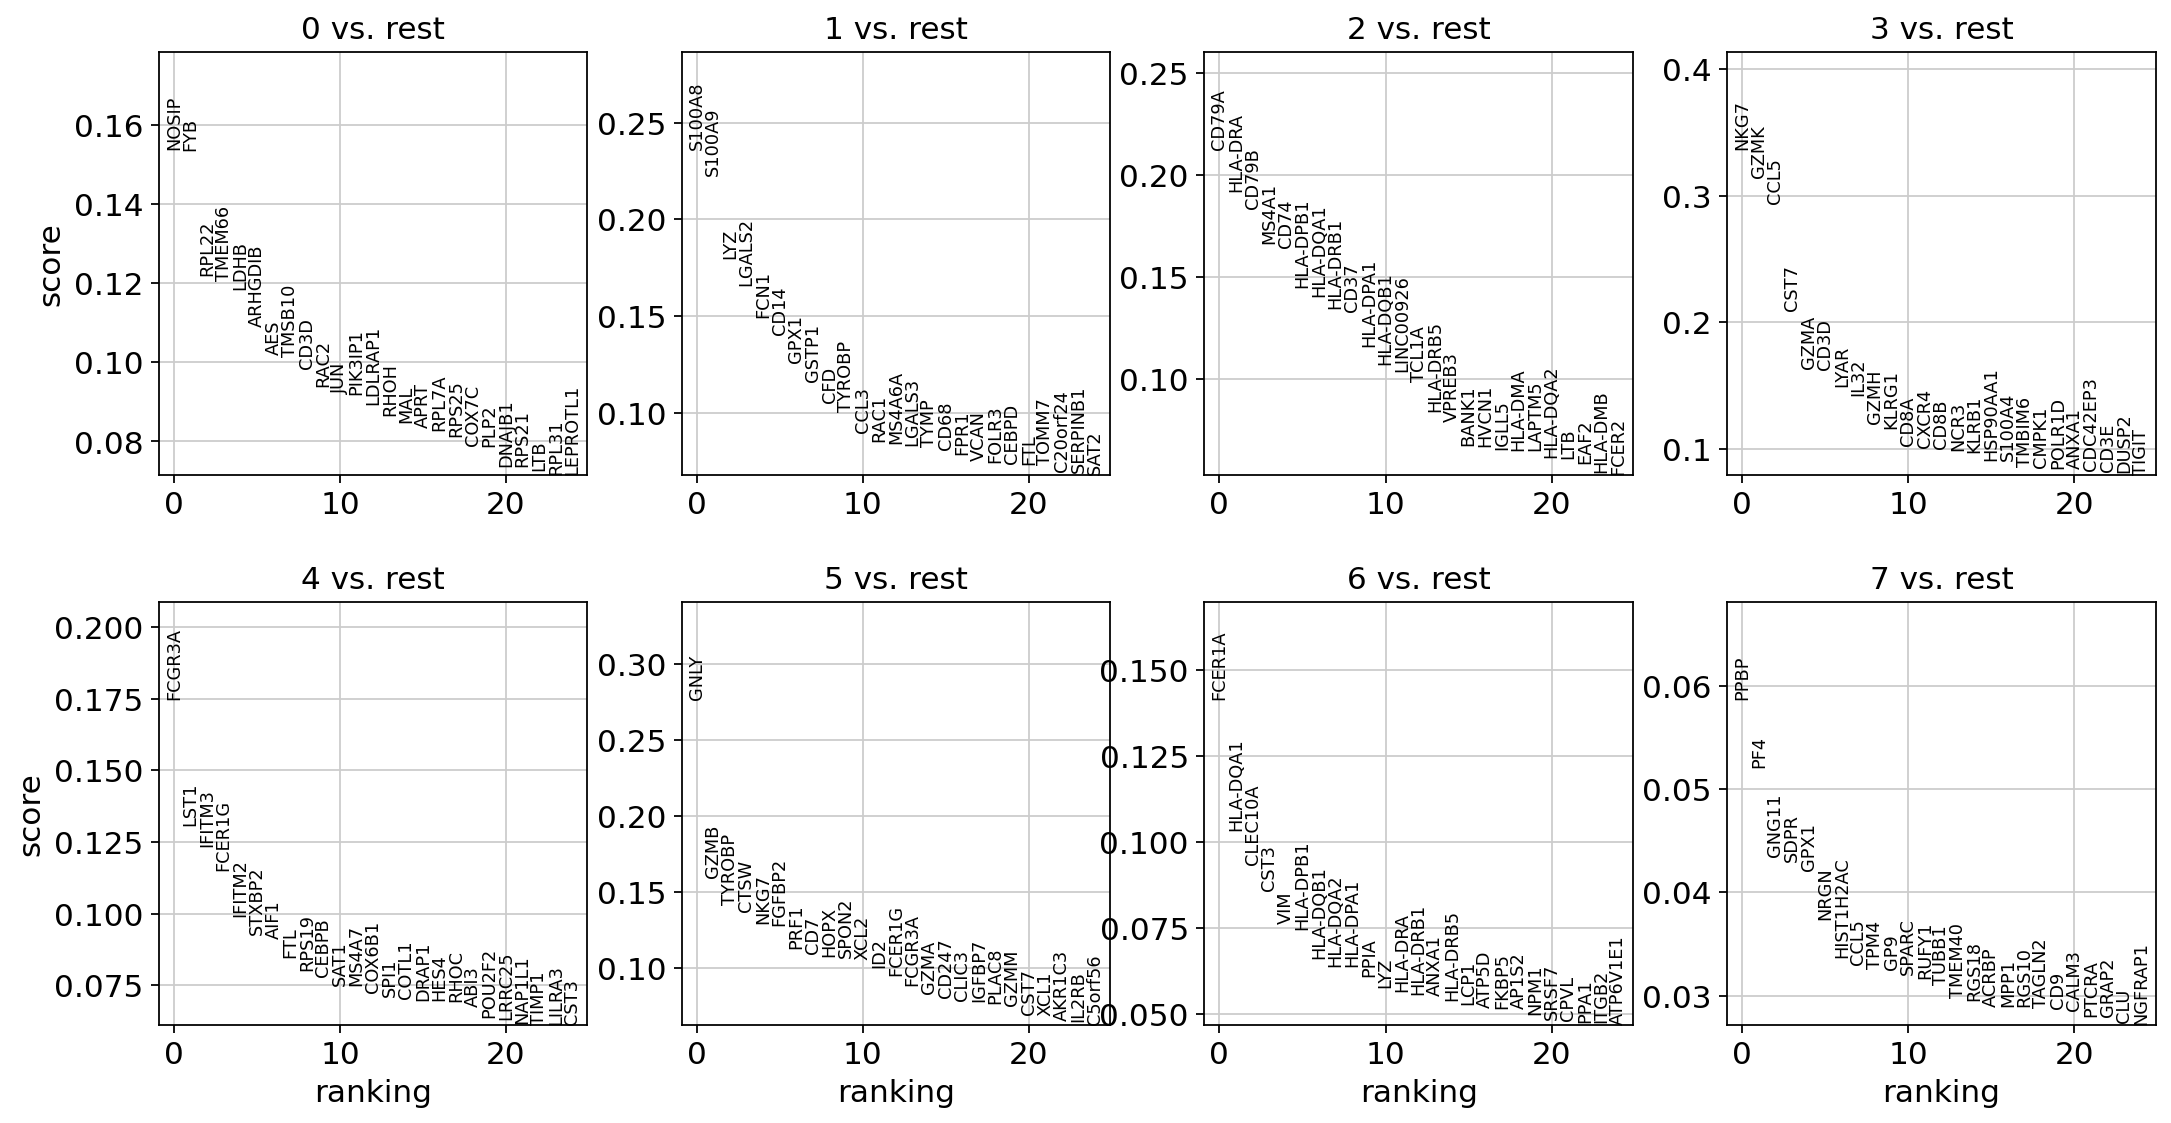

In [50]:
# 作为一种替代方法，让我们用逻辑回归对基因进行排序。
# 例如，Natranos等人(2018)就提出了这一点。
# 本质的区别是，在这里，我们使用多变量方法，而传统的差异测试是单变量。Clark et al.(2014)有更多细节。
sc.tl.rank_genes_groups(adata, 'leiden', method='logreg')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [54]:
# 让我们也定义一个标记基因列表，以供以后参考。
marker_genes = ['IL7R', 'CD79A', 'MS4A1', 'CD8A', 'CD8B', 'LYZ', 'CD14',
                'LGALS3', 'S100A8', 'GNLY', 'NKG7', 'KLRB1',
                'FCGR3A', 'MS4A7', 'FCER1A', 'CST3', 'PPBP']
adata = sc.read(results_file)

In [23]:
# 在一个数据框架中显示每簇0,1，…，7中排名靠前的5个基因。
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(5)

0       1         2     3       4     5         6      7
0   LDHB     LYZ      CD74  CCL5    LST1  NKG7  HLA-DPB1    PF4
1  RPS12  S100A9     CD79A  NKG7  FCER1G  GNLY  HLA-DPA1   SDPR
2  RPS25  S100A8   HLA-DRA  CST7    AIF1  GZMB    FCER1A  GNG11
3  RPS27  TYROBP     CD79B   B2M   COTL1  CTSW  HLA-DRB1   PPBP
4   RPS6    FCN1  HLA-DPB1  GZMA    FTH1  PRF1  HLA-DQA1   NRGN

In [135]:
# 把分数和分组列在一张表格上。
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).head(5)

0_n            0_p     1_n            1_p       2_n            2_p   3_n  \
0  RPS12  8.937809e-221     LYZ  7.634876e-249      CD74  2.487145e-183  CCL5   
1   LDHB  7.135819e-219  S100A9  4.626358e-246     CD79A  1.679730e-170  NKG7   
2  RPS25  5.290576e-199  S100A8  1.622835e-238   HLA-DRA  6.942399e-167   B2M   
3  RPS27  7.411668e-187  TYROBP  2.957652e-220     CD79B  2.569135e-154  CST7   
4   RPS6  2.443986e-185     FTL  2.479195e-214  HLA-DPB1  3.580735e-148  GZMA   

             3_p   4_n           4_p     5_n           5_p       6_n  \
0  2.142032e-127  NKG7  1.203971e-96    LST1  1.322111e-88  HLA-DPA1   
1  2.065676e-102  GNLY  1.257170e-88  FCER1G  6.259712e-85  HLA-DPB1   
2   2.962035e-81  GZMB  1.429027e-88    AIF1  1.348814e-83   HLA-DRA   
3   7.880686e-78  CTSW  4.144726e-87   COTL1  5.974694e-82  HLA-DRB1   
4   3.185302e-75  PRF1  1.692100e-85  FCGR3A  1.392377e-77      CD74   

            6_p    7_n           7_p  
0  5.422417e-21    PF4  4.722886e-10  
1  7.591860e-21   SDPR  4.733899e-10  
2  1.306768e-19  GNG11  4.733899e-10  
3  1.865104e-19   PPBP  4.744938e-10  
4  5.853161e-19   NRGN  4.800511e-10

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


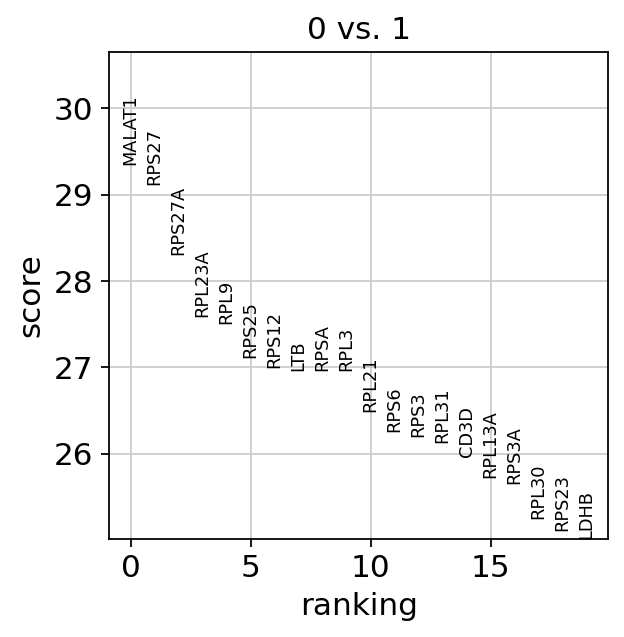

In [53]:
# 与单个集群相比:
sc.tl.rank_genes_groups(adata, 'leiden', groups=['0'], reference='1', method='wilcoxon')
sc.pl.rank_genes_groups(adata, groups=['0'], n_genes=20)

/home/luotao/anaconda3/envs/stock/lib/python3.9/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


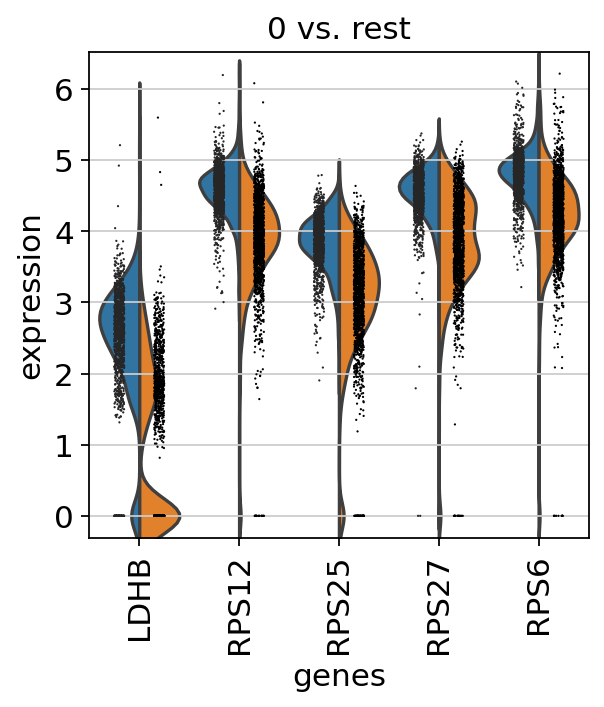

In [55]:
# 用计算的差分表达式重新加载对象(即通过与其余组的比较来加载DE):
sc.pl.rank_genes_groups_violin(adata, groups='0', n_genes=5)

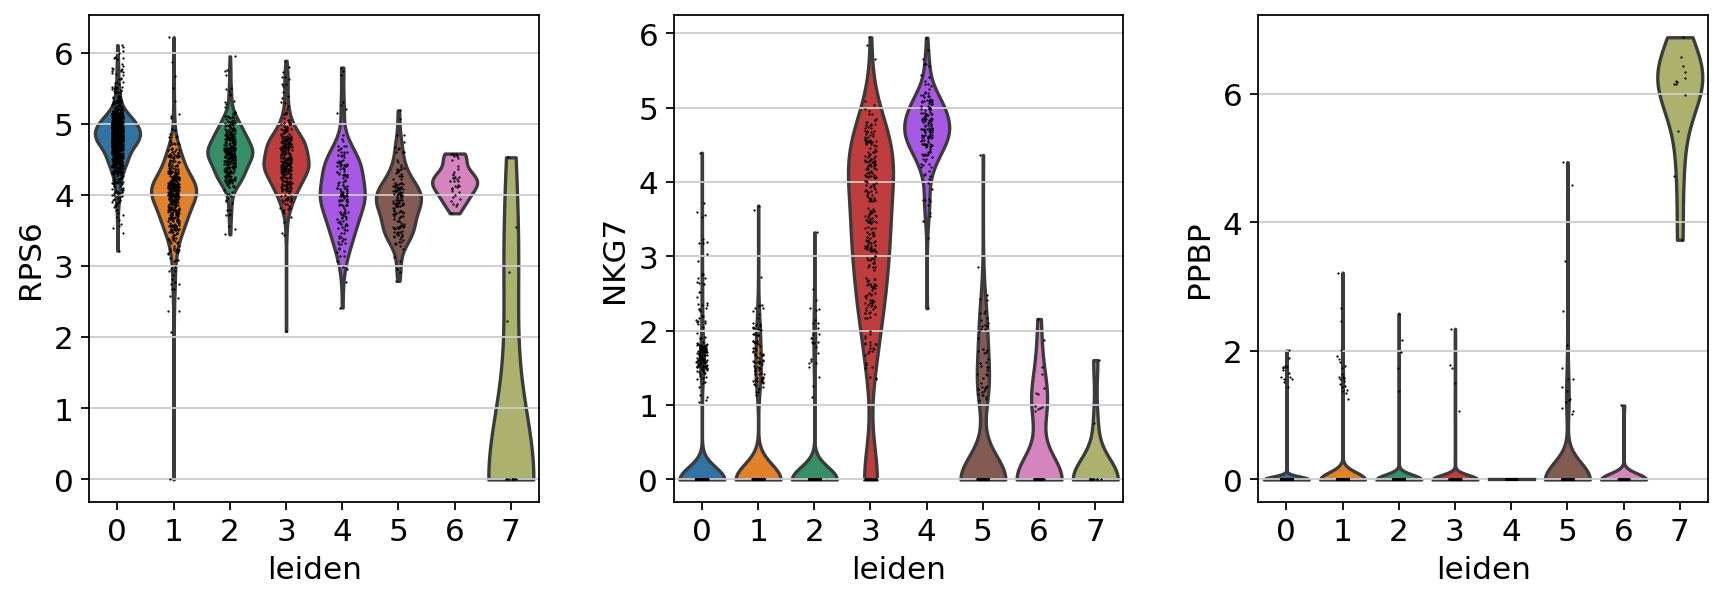

In [142]:

# 如果你想比较不同群体的某个基因，可以使用下面的方法。
sc.pl.violin(adata, ['RPS6', 'NKG7', 'PPBP'], groupby='leiden')

/home/luotao/anaconda3/envs/stock/lib/python3.9/site-packages/anndata/_core/anndata.py:1160: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  self.obs[key].cat.rename_categories(categories, inplace=True)
/home/luotao/anaconda3/envs/stock/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


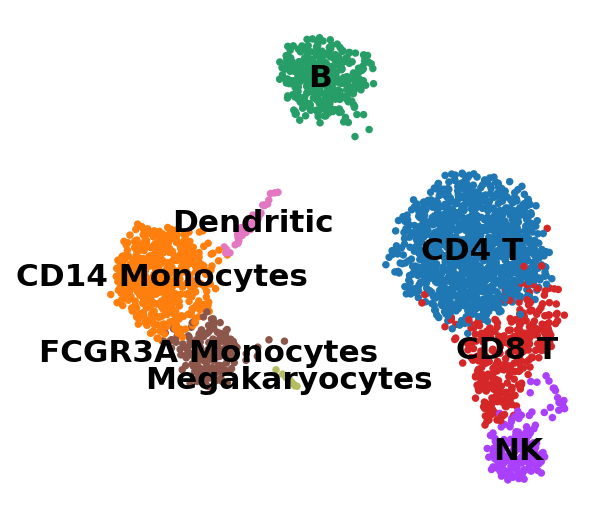

In [147]:
# 准确的标记细胞类型。
new_cluster_names = [
    'CD4 T', 'CD14 Monocytes',
    'B', 'CD8 T',
    'NK', 'FCGR3A Monocytes',
    'Dendritic', 'Megakaryocytes']  #表需要按顺序标记

adata.rename_categories('leiden', new_cluster_names)

sc.pl.umap(adata, color='leiden', legend_loc='on data', title='', frameon=False, save='.pdf')

/home/luotao/anaconda3/envs/stock/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


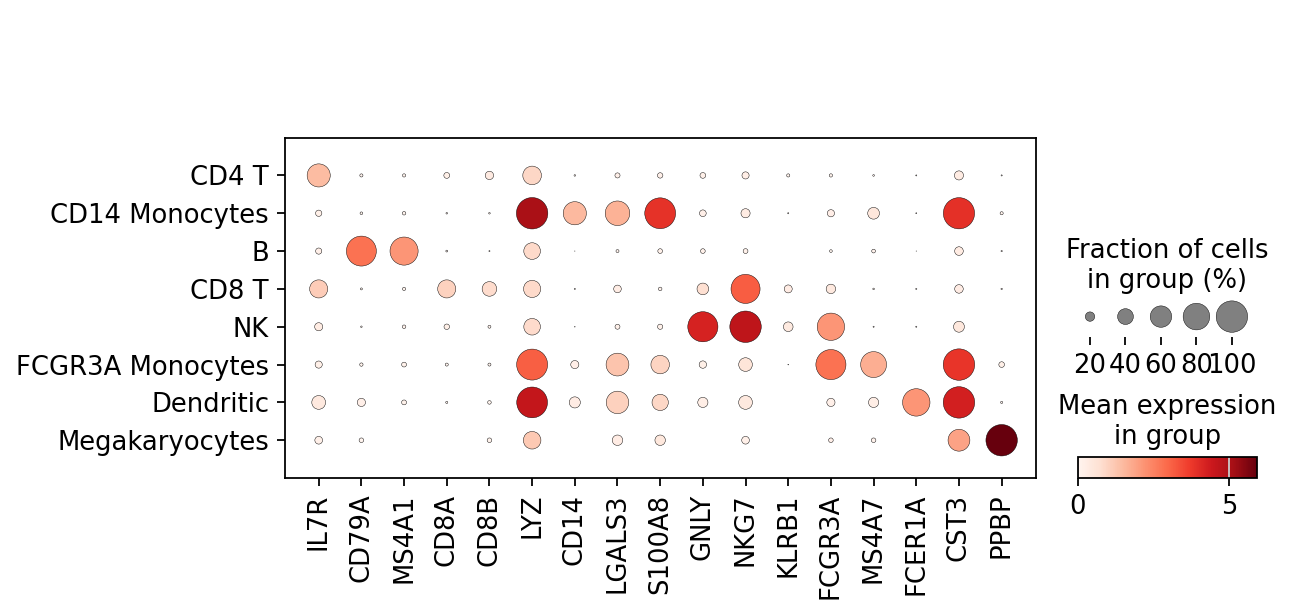

In [148]:
# 现在我们注释了细胞类型，让我们可视化标记基因。
sc.pl.dotplot(adata, marker_genes, groupby='leiden');

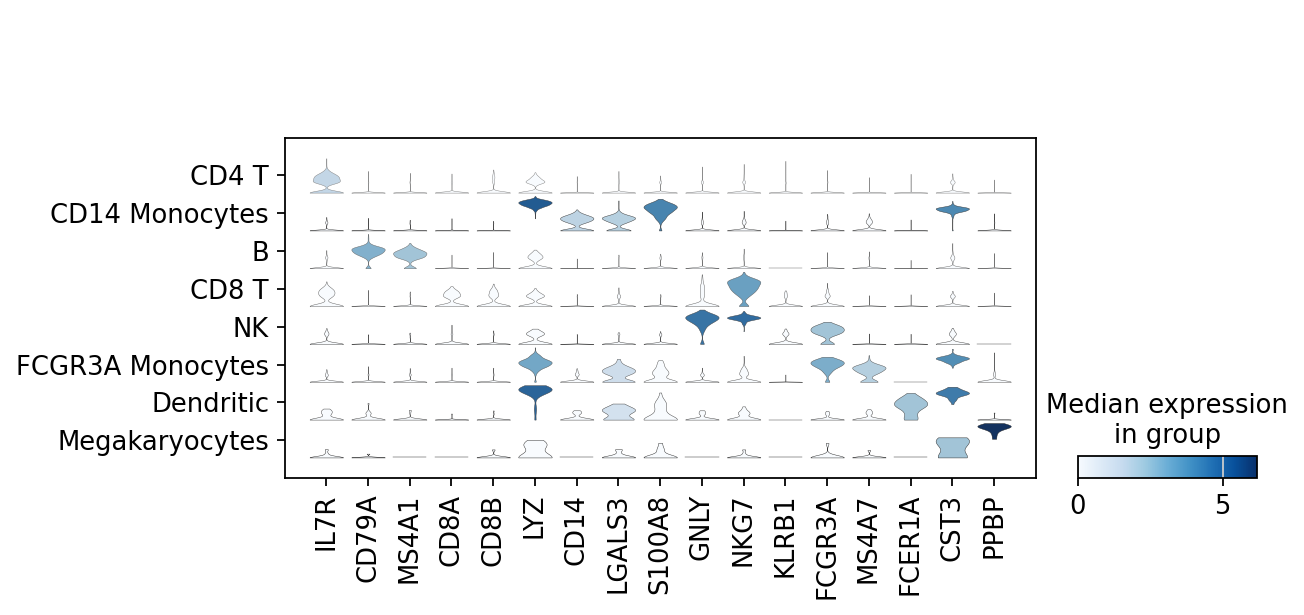

In [149]:
# 也可以画小提琴图
sc.pl.stacked_violin(adata, marker_genes, groupby='leiden', rotation=90);

In [150]:
# 在分析过程中，AnnData积累了以下注释。
adata

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [151]:
# `compression='gzip'` saves disk space, but slows down writing and subsequent reading
# 存成压缩文件节省磁盘空间，但会降低写入和随后的读取速度
adata.write(results_file, compression='gzip')  

In [153]:
# 使用h5ls获得文件的粗略概述，它有许多选项-更多细节请参阅这里。
# 文件格式在将来可能还需要进一步优化。不过，所有的读取功能都将保持向后兼容。
# 如果您希望将该文件共享给只想将其用于可视化的人，那么减少文件大小的一个简单方法是删除密集缩放和校正的数据矩阵。
# 该文件仍然包含data.raw中可视化中使用的原始数据。
adata.raw.to_adata().write('./write/pbmc3k_withoutX.h5ad')

In [154]:
# 如果您想要导出为“csv”，您有以下选项:

# Export single fields of the annotation of observations
# adata.obs[['n_counts', 'louvain_groups']].to_csv(
#     './write/pbmc3k_corrected_louvain_groups.csv')

# Export single columns of the multidimensional annotation
# adata.obsm.to_df()[['X_pca1', 'X_pca2']].to_csv(
#     './write/pbmc3k_corrected_X_pca.csv')

# Or export everything except the data using `.write_csvs`.
# Set `skip_data=False` if you also want to export the data.
# adata.write_csvs(results_file[:-5], )